# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [118]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips = tips[tips['tip_pct']<.5]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [119]:
regr = smf.ols('tip ~ net_bill', data=tips).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           2.41e-25
Time:                        01:50:35   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

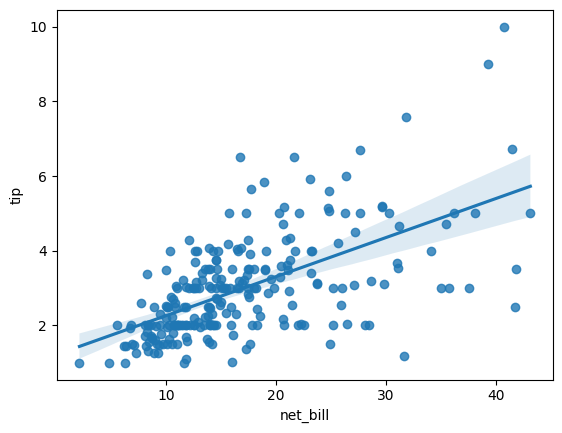

In [120]:
sns.regplot(tips, x = 'net_bill', y = 'tip');

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [152]:
regr_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
regr_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.31e-12
Time:                        02:33:20   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

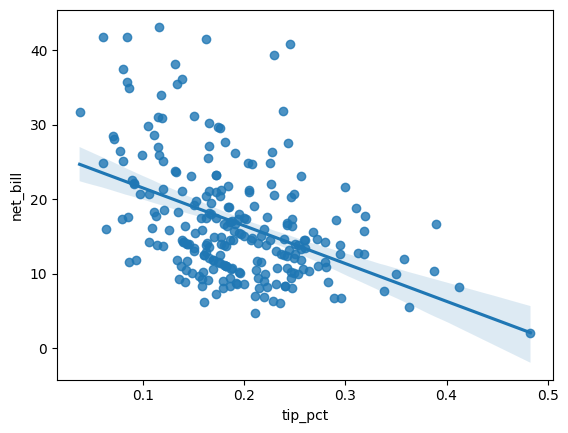

In [125]:
sns.regplot(tips, x = 'tip_pct', y = 'net_bill');

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Nos dois graficos há mais dados no menores valores, quanto maiores os valores liquidos menos dados temos. No primeiro grafico há uma correlação positiva, quando a variavel `'net_bill'` aumenta a variavel `'tip'` tende a aumentar também, enquanto que no grafico 2 vemos o inverso enquanto `'net_bill'` aumenta `'tip_pct'` tende a diminuir. Nos dois modelos o R2 é relativamente baixo, mas o primeiro modelo tem um R2 melhor possibilitando uma melhor previsão.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [153]:
regr_tip_pct.fittedvalues

0      0.194125
1      0.221392
2      0.188410
3      0.177727
4      0.175448
         ...   
239    0.167492
240    0.159760
241    0.176606
242    0.193789
243    0.194872
Length: 242, dtype: float64

In [154]:
regr_tip_pct.fittedvalues * tips['net_bill']

0      3.102114
1      1.921686
2      3.299055
3      3.620296
4      3.680906
         ...   
239    3.870744
240    4.022759
241    3.650452
242    3.114183
243    3.075078
Length: 242, dtype: float64

In [155]:
score = r2_score(y_true=tips['tip'], y_pred=regr_tip_pct.fittedvalues * tips.net_bill)
score

0.3503553432251352

In [157]:
print('𝑅2 dos valores preditos para `tip` como tip_pct(predict) * net_bill:', round(r2 * 100, 2))

print('𝑅2 do modelo `regr_tip_pct`:', round(regr_tip_pct.rsquared * 100, 2))

𝑅2 dos valores preditos para `tip` como tip_pct(predict) * net_bill: 35.04
𝑅2 do modelo `regr_tip_pct`: 18.95
